In [1]:
import keras,matplotlib, random, math, csv, re
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

In [2]:
def cnn(dp1_rate, dp2_rate, bat_size, lr_rate):
  num_classes = 10  #맞출수 있는 레이블 개수
  epochs = 30

  # data 조정
  # fashion mnist train 60000, test 1000개 있다
  (xf_train, yf_train), (xf_test, yf_test) = fashion_mnist.load_data()
  # resize the image size
  xf_train = xf_train.reshape((xf_train.shape[0], 28, 28, 1))
  xf_test = xf_test.reshape((xf_test.shape[0], 28, 28, 1))
  input_shape = (28, 28, 1)
  # 픽셀의 intensities는 [0,1] 범위로 조정
  xf_train = xf_train.astype("float32") / 255.0
  xf_test = xf_test.astype("float32") / 255.0
  # one-hot encode the training and testing lables
  yf_train = keras.utils.to_categorical(yf_train, num_classes)
  yf_test = keras.utils.to_categorical(yf_test, num_classes)

  #CNN 모델
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3),
                  activation='relu',
                  input_shape = input_shape)) #(28, 28)
  model.add(Conv2D(64, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dp1_rate)) #여기서 사용-------------------------------------
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(dp2_rate)) #여기서 사용-------------------------------------
  model.add(Dense(num_classes, activation = 'softmax'))

  model.compile(loss = "categorical_crossentropy",
              optimizer = keras.optimizers.Adadelta(learning_rate=lr_rate), #여기서 사용---------------
              metrics = ['accuracy'])
  
  history = model.fit(xf_train,yf_train,
                      batch_size = bat_size, #여기서 사용-----------------------
                      epochs = epochs, 
                      verbose = 1,
                      validation_data = (xf_test, yf_test))

  new = list(history.history['val_accuracy'])
  return(new)

In [3]:
#가장 좋았던 hyperparameters
grid_search = [0.4, 0.2, 100, 0.1]
ga = [0.19, 0.11, 8, 0.1]

# 모델 돌려서 accuracy 값 저장
grid_accuracy = cnn(grid_search[0], grid_search[1], grid_search[2], grid_search[3])
ga_accuracy = cnn(ga[0], ga[1], ga[2], ga[3])

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/30
600/600 [==============================] - 3s 5ms/step - loss: 0.7534 - accuracy: 0.7268 - val_loss: 0.5037 - val_accuracy: 0.8182
Epoch 2/30
600/600 [==============================] - 3s 5ms/step - loss: 0.4899 - accuracy: 0.8225 - val_loss: 0.4347 - val_accuracy: 0.8443
Epoch 3/30
600/600 [==============================] - 3s 5ms/step - loss: 0.4253 - accuracy: 0.8479 - val_loss: 0.3968 - val_accuracy: 0.8580
Epoch 4/30
600/600 [==============================] - 3s 5ms/step - loss: 0.3863 - accuracy: 0.8625 - val_loss: 0.3606 - val_accuracy: 0.8703
Epoch 5/30
600/600 [==============================] - 3s 5ms/step - loss: 0.3599 - accuracy: 0.8711 - val_loss: 0.3484 - val_accuracy: 0.8753
Epoch 6/30
600/600 [==============================] - 3s 5ms/step - loss: 0.3408 - accuracy: 0.8784 - val_loss: 0.3308 - val_accuracy: 0.8813
Epoch 7/30
600/600 [==============================] - 3s 5ms/step - loss: 0.3240 - ac

In [4]:
# 제일 높은 accuracy 찾기
grid_high_accuracy = 0
ga_high_accuracy = 0

for i in range(len(grid_accuracy)):
  current_accuracy = round(grid_accuracy[i],4)
  grid_accuracy[i] = current_accuracy
  if current_accuracy > grid_high_accuracy:
    grid_high_accuracy = current_accuracy

for i in range(len(ga_accuracy)):
  current_accuracy = round(ga_accuracy[i],4)
  ga_accuracy[i] = current_accuracy
  if current_accuracy > ga_high_accuracy:
    ga_high_accuracy = current_accuracy
  
print(grid_high_accuracy)
print(ga_high_accuracy)

0.9154
0.9276


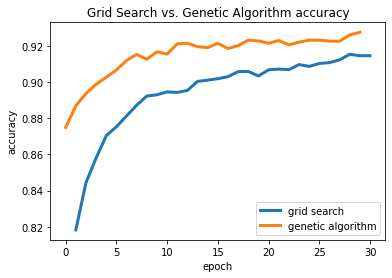

In [5]:
# Grid Search vs. Genetic Algorithm accuracy (in 30 epochs)
epoch=30
length = np.arange(1,epoch+1)
plt.plot(length, grid_accuracy, ga_accuracy, linewidth=3)
plt.legend(('grid search', 'genetic algorithm'), loc='lower right')
plt.title('Grid Search vs. Genetic Algorithm accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


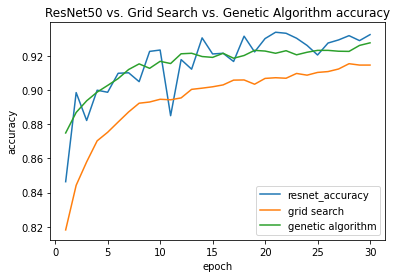

In [11]:
# ResNet50 vs. Grid Search vs. Genetic Algorithm accuracy (in 30 epochs)
drive.mount('/content/drive')
resnet_accuracy=[]
csvfile = list(csv.reader(open('/content/drive/My Drive/SEP592_project/resnet50_result5.csv')))
p = '[\d]*[.][\d]+'
for row in csvfile:
  if re.search(p, row[0]) is not None:
    for catch in re.finditer(p, row[0]):
      new  = round(float(catch[0]),4)
      resnet_accuracy.append(new)

# print(resnet_accuracy)
# print(grid_accuracy)
# print(ga_accuracy)

plt.plot(length, resnet_accuracy)
plt.plot(length, grid_accuracy)
plt.plot(length, ga_accuracy)
plt.legend(('resnet_accuracy', 'grid search', 'genetic algorithm'), loc='lower right')
plt.title('ResNet50 vs. Grid Search vs. Genetic Algorithm accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

['0.9229', '[0.9102, 0.9133, 0.9191, 0.9229, 0.918, 0.9136, 0.9203, 0.919, 0.919, 0.9179]', '(0.52, 0.4, 742, 0.005)']
['0.921', '[0.921, 0.8985, 0.912, 0.9126, 0.9148, 0.9172, 0.9161, 0.9102, 0.9208, 0.9208]', '(0.52, 0.72, 742, 0.005)']
['0.921', '[0.9181, 0.921, 0.918, 0.9102, 0.9142, 0.914, 0.9112, 0.9143, 0.9194, 0.9121]', '(0.52, 0.36, 742, 0.005)']
['0.921', '[0.9191, 0.9189, 0.921, 0.9147, 0.9149, 0.9175, 0.9185, 0.9185, 0.9191, 0.9166]', '(0.52, 0.72, 742, 0.005)']
['0.9102', '0.9133', '0.9191', '0.9229', '0.918', '0.9136', '0.9203', '0.919', '0.919', '0.9179']


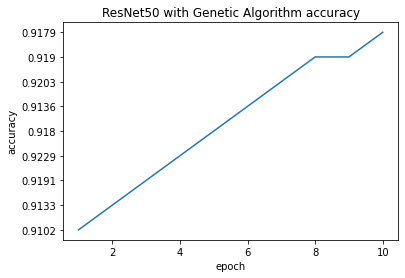

In [21]:
#Genetic Algorithm을 ResNet50에 적용하기
resnetGA_accuracy=[]
csvfile = list(csv.reader(open('/content/drive/My Drive/SEP592_project/resnet_ga_result2.csv')))
p = '[\d]*[.][\d]+'
num=0
for row in csvfile:
  print(row)
  if num == 0:
    if re.search(p, row[1]) is not None:
      for catch in re.finditer(p, row[1]):
        resnetGA_accuracy.append(catch[0])
    num+=1
  else:
    num+=1
print(resnetGA_accuracy)
length2 = np.arange(1,11)
plt.plot(length2, resnetGA_accuracy)
# plt.legend(('genetic algorithm'), loc='lower right')
plt.title('ResNet50 with Genetic Algorithm accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
# save the datasets
# drive.mount('/content/drive')
df = pd.DataFrame(ga_accuracy)
df.to_csv('/content/drive/My Drive/SEP592_project/gaResult.csv', header=None, index=None)

df = pd.DataFrame(grid_accuracy)
df.to_csv('/content/drive/My Drive/SEP592_project/gridResult.csv', header=None, index=None)